In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:
df = pd.read_csv("EDA_Dataset.csv")

In [3]:
df.head(5)

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,ResolutionTimeMinutes
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3,82984.950000
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2,0.383333
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2,8.150000
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5,4.883333
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5,4.983333


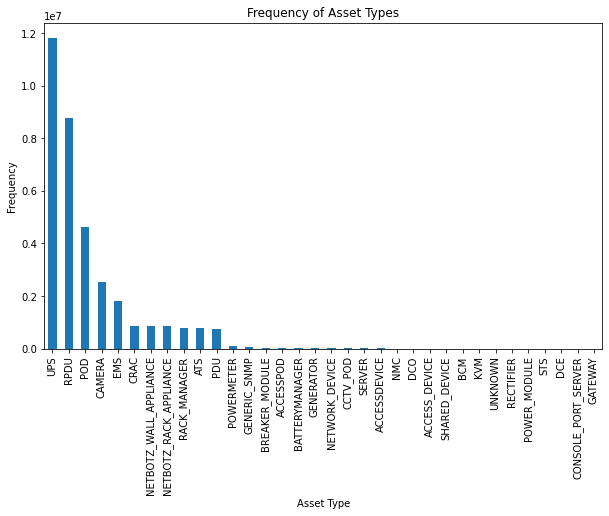

In [4]:
# Calculate the frequency of each asset type
asset_type_counts = df['AssetType'].value_counts()

# Plot the frequency of asset types
plt.figure(figsize=(10, 6))
ax = asset_type_counts.plot(kind='bar')
plt.title('Frequency of Asset Types')
plt.xlabel('Asset Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

In [5]:
df["AssetType"].unique()

array(['UPS', 'RACK_MANAGER', 'POWERMETER', 'POD', 'RPDU', 'CRAC', 'ATS',
       'CAMERA', 'EMS', 'SERVER', 'BREAKER_MODULE', 'BATTERYMANAGER',
       'NETBOTZ_RACK_APPLIANCE', 'NETBOTZ_WALL_APPLIANCE', 'GENERIC_SNMP',
       'PDU', 'ACCESSDEVICE', 'NETWORK_DEVICE', 'POWER_MODULE',
       'ACCESSPOD', 'GENERATOR', 'DCE', 'ACCESS_DEVICE', 'SHARED_DEVICE',
       'UNKNOWN', 'KVM', 'RECTIFIER', 'NMC', 'DCO', 'BCM', 'CCTV_POD',
       'STS', 'CONSOLE_PORT_SERVER', 'GATEWAY'], dtype=object)

In [6]:
# Filter the data for AssetType 'UPS'
ups_data = df[df['AssetType'] == 'UPS']

ups_data.head(5)

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,ResolutionTimeMinutes
0,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Battery Near End Of Life Cleared,The battery is no longer near the end of life.,WARNING,2021-01-17T23:32:55Z,2021-03-16T14:37:52Z,1.0,3,82984.950000
1,001e6d91-324b-4b99-84f8-9435148de9ce,5effecae-fdee-494a-bf38-d4cb5d7cc405,US,Default Location,UPS,Power Failure Cleared,No longer on battery power.,WARNING,2021-01-08T20:55:56Z,2021-01-08T20:56:19Z,1.0,2,0.383333
2,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-08T20:28:05Z,2021-01-08T20:36:14Z,1.0,2,8.150000
3,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T11:51:23Z,2021-01-29T11:56:16Z,1.0,5,4.883333
4,004209ba-f692-41b8-af30-5b51996f1abb,a3768a07-4e2d-4075-ab6b-66e3541fc6c4,US,275102b5-af38-456c-982b-7a6d33850e13,UPS,Device Communication Alert,"Communication with the UPS \""redact\"" has been...",CRITICAL,2021-01-29T09:41:23Z,2021-01-29T09:46:22Z,1.0,5,4.983333


In [7]:
len(ups_data)

11805752

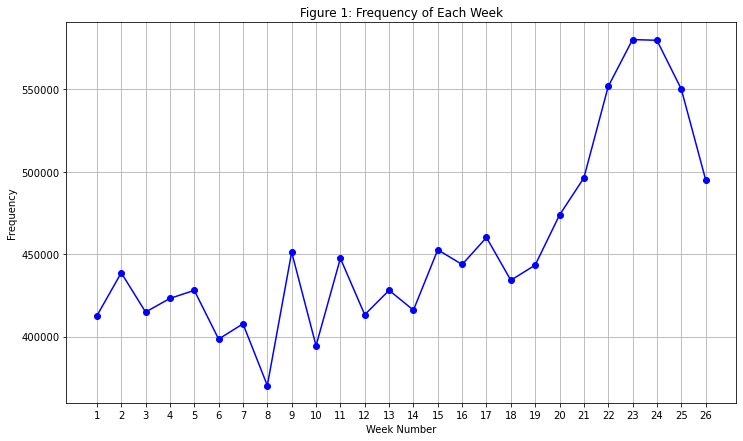

In [9]:
# Count the frequency of each week
week_counts = ups_data['week'].value_counts().sort_index()

# Creating the line plot
plt.figure(figsize=(12, 7))
plt.plot(week_counts.index.values, week_counts.values, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Figure 1: Frequency of Each Week')
plt.xlabel('Week Number')
plt.ylabel('Frequency')

# Setting the x-ticks to ensure every week number is shown
plt.xticks(week_counts.index.values)

# Optionally, you can add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

/tmp/ipykernel_42828/3942616115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ups_data['ActivatedTimestamp'] = pd.to_datetime(ups_data['ActivatedTimestamp'])


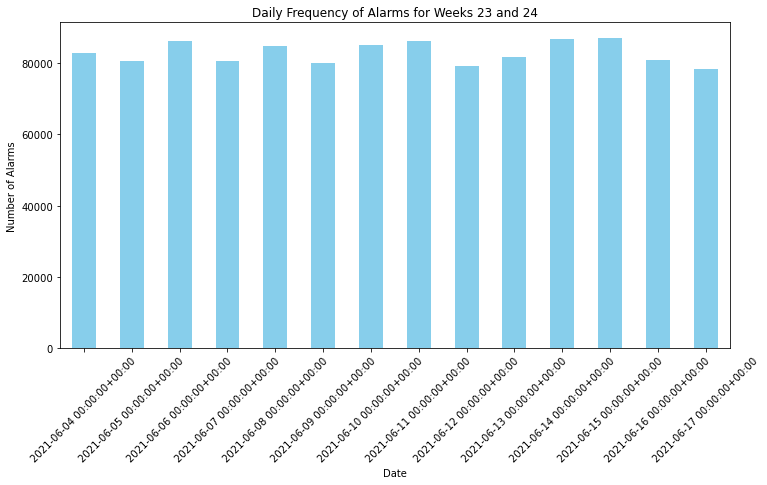

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ups_data is already defined and parsed as in previous steps
# Parse the timestamps and set index if not already done
ups_data['ActivatedTimestamp'] = pd.to_datetime(ups_data['ActivatedTimestamp'])
ups_data = ups_data.set_index('ActivatedTimestamp')

# Filter data for weeks 23 and 24
weeks_23_24 = ups_data[(ups_data['week'] == 23) | (ups_data['week'] == 24)]

# Ensure the index is set to the datetime index for resampling
weeks_23_24 = weeks_23_24.sort_index()

# Resample the data to daily counts
daily_counts_23_24 = weeks_23_24['AssetId'].resample('D').count()

# Plot the data
plt.figure(figsize=(12, 6))
daily_counts_23_24.plot(kind='bar', color='skyblue')
plt.title('Daily Frequency of Alarms for Weeks 23 and 24')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Display the data for further inspection
print(daily_counts_23_24)

ActivatedTimestamp
2021-06-04 00:00:00+00:00    82957
2021-06-05 00:00:00+00:00    80590
2021-06-06 00:00:00+00:00    86271
2021-06-07 00:00:00+00:00    80670
2021-06-08 00:00:00+00:00    84682
2021-06-09 00:00:00+00:00    80085
2021-06-10 00:00:00+00:00    84994
2021-06-11 00:00:00+00:00    86085
2021-06-12 00:00:00+00:00    79038
2021-06-13 00:00:00+00:00    81624
2021-06-14 00:00:00+00:00    86802
2021-06-15 00:00:00+00:00    87078
2021-06-16 00:00:00+00:00    80887
2021-06-17 00:00:00+00:00    78301
Freq: D, Name: AssetId, dtype: int64


In [12]:
ups_data.columns

Index(['AssetId', 'organizationid', 'organizationcountrycode', 'locationid',
       'AssetType', 'AlarmLabel', 'AlarmMessage', 'Severity',
       'ClearedTimestamp', 'month', 'week', 'ResolutionTimeMinutes'],
      dtype='object')

/tmp/ipykernel_42828/386158433.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts_14 = df_filtered_14['AssetId'].resample('H').count()


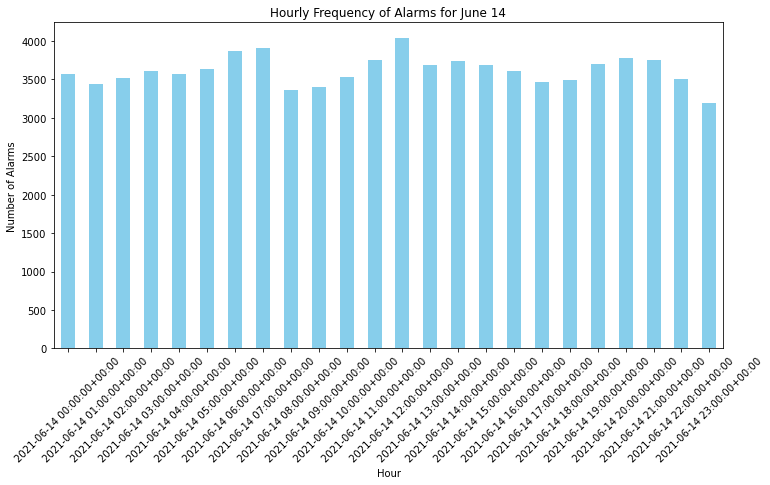

ActivatedTimestamp
2021-06-14 00:00:00+00:00    3571
2021-06-14 01:00:00+00:00    3440
2021-06-14 02:00:00+00:00    3517
2021-06-14 03:00:00+00:00    3611
2021-06-14 04:00:00+00:00    3570
2021-06-14 05:00:00+00:00    3636
2021-06-14 06:00:00+00:00    3871
2021-06-14 07:00:00+00:00    3904
2021-06-14 08:00:00+00:00    3357
2021-06-14 09:00:00+00:00    3407
2021-06-14 10:00:00+00:00    3535
2021-06-14 11:00:00+00:00    3752
2021-06-14 12:00:00+00:00    4041
2021-06-14 13:00:00+00:00    3692
2021-06-14 14:00:00+00:00    3739
2021-06-14 15:00:00+00:00    3686
2021-06-14 16:00:00+00:00    3610
2021-06-14 17:00:00+00:00    3464
2021-06-14 18:00:00+00:00    3498
2021-06-14 19:00:00+00:00    3694
2021-06-14 20:00:00+00:00    3772
2021-06-14 21:00:00+00:00    3746
2021-06-14 22:00:00+00:00    3499
2021-06-14 23:00:00+00:00    3190
Freq: h, Name: AssetId, dtype: int64


/tmp/ipykernel_42828/386158433.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts_15 = df_filtered_15['AssetId'].resample('H').count()


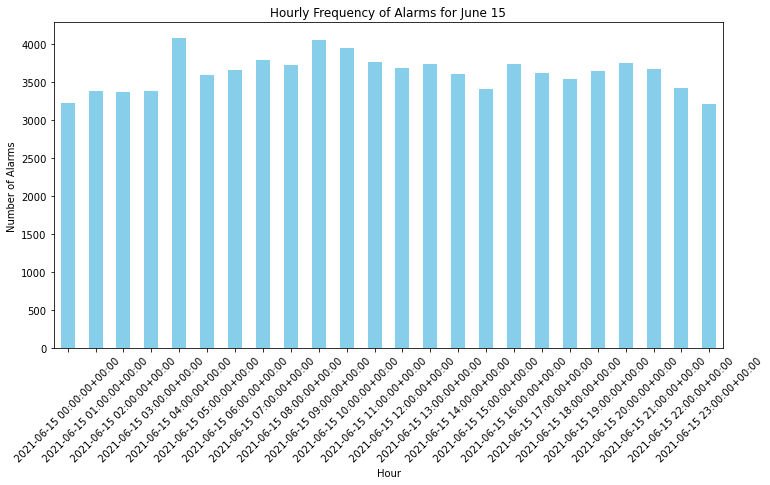

ActivatedTimestamp
2021-06-15 00:00:00+00:00    3232
2021-06-15 01:00:00+00:00    3389
2021-06-15 02:00:00+00:00    3367
2021-06-15 03:00:00+00:00    3385
2021-06-15 04:00:00+00:00    4085
2021-06-15 05:00:00+00:00    3593
2021-06-15 06:00:00+00:00    3664
2021-06-15 07:00:00+00:00    3787
2021-06-15 08:00:00+00:00    3732
2021-06-15 09:00:00+00:00    4061
2021-06-15 10:00:00+00:00    3946
2021-06-15 11:00:00+00:00    3773
2021-06-15 12:00:00+00:00    3688
2021-06-15 13:00:00+00:00    3736
2021-06-15 14:00:00+00:00    3614
2021-06-15 15:00:00+00:00    3406
2021-06-15 16:00:00+00:00    3738
2021-06-15 17:00:00+00:00    3624
2021-06-15 18:00:00+00:00    3547
2021-06-15 19:00:00+00:00    3652
2021-06-15 20:00:00+00:00    3750
2021-06-15 21:00:00+00:00    3674
2021-06-15 22:00:00+00:00    3420
2021-06-15 23:00:00+00:00    3215
Freq: h, Name: AssetId, dtype: int64


In [13]:
# Filter data for June 14
df_filtered_14 = ups_data[ups_data.index.date == pd.to_datetime('2021-06-14').date()]

# Resample the data to hourly counts for June 14
hourly_counts_14 = df_filtered_14['AssetId'].resample('H').count()

# Plot the data for June 14
plt.figure(figsize=(12, 6))
hourly_counts_14.plot(kind='bar', color='skyblue')
plt.title('Hourly Frequency of Alarms for June 14')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(rotation=45)
plt.show()

# Display the data for further inspection
print(hourly_counts_14)

# Filter data for June 15
df_filtered_15 = ups_data[ups_data.index.date == pd.to_datetime('2021-06-15').date()]

# Resample the data to hourly counts for June 15
hourly_counts_15 = df_filtered_15['AssetId'].resample('H').count()

# Plot the data for June 15
plt.figure(figsize=(12, 6))
hourly_counts_15.plot(kind='bar', color='skyblue')
plt.title('Hourly Frequency of Alarms for June 15')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(rotation=45)
plt.show()

# Display the data for further inspection
print(hourly_counts_15)

In [14]:
# Display the data for further inspection
print(hourly_counts_14)

ActivatedTimestamp
2021-06-14 00:00:00+00:00    3571
2021-06-14 01:00:00+00:00    3440
2021-06-14 02:00:00+00:00    3517
2021-06-14 03:00:00+00:00    3611
2021-06-14 04:00:00+00:00    3570
2021-06-14 05:00:00+00:00    3636
2021-06-14 06:00:00+00:00    3871
2021-06-14 07:00:00+00:00    3904
2021-06-14 08:00:00+00:00    3357
2021-06-14 09:00:00+00:00    3407
2021-06-14 10:00:00+00:00    3535
2021-06-14 11:00:00+00:00    3752
2021-06-14 12:00:00+00:00    4041
2021-06-14 13:00:00+00:00    3692
2021-06-14 14:00:00+00:00    3739
2021-06-14 15:00:00+00:00    3686
2021-06-14 16:00:00+00:00    3610
2021-06-14 17:00:00+00:00    3464
2021-06-14 18:00:00+00:00    3498
2021-06-14 19:00:00+00:00    3694
2021-06-14 20:00:00+00:00    3772
2021-06-14 21:00:00+00:00    3746
2021-06-14 22:00:00+00:00    3499
2021-06-14 23:00:00+00:00    3190
Freq: h, Name: AssetId, dtype: int64


/tmp/ipykernel_42828/3608088546.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts_15 = df_filtered_15['AssetId'].resample('H').count()


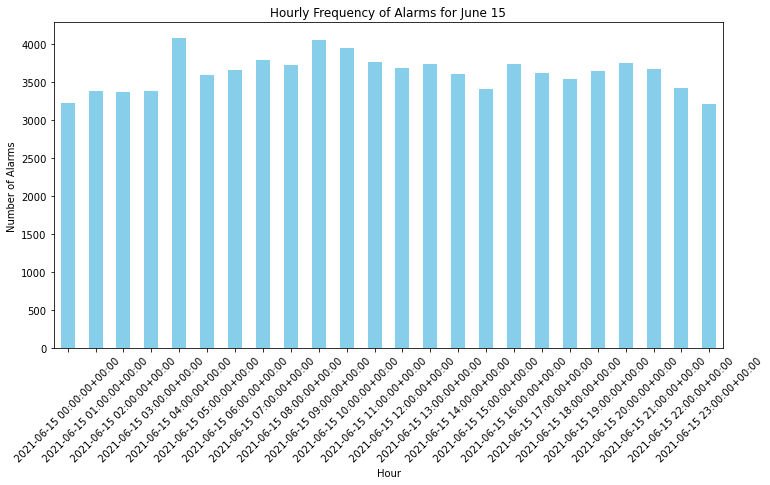

In [15]:
# Filter data for June 15
df_filtered_15 = ups_data[ups_data.index.date == pd.to_datetime('2021-06-15').date()]

# Resample the data to hourly counts for June 15
hourly_counts_15 = df_filtered_15['AssetId'].resample('H').count()

# Plot the data for June 15
plt.figure(figsize=(12, 6))
hourly_counts_15.plot(kind='bar', color='skyblue')
plt.title('Hourly Frequency of Alarms for June 15')
plt.xlabel('Hour')
plt.ylabel('Number of Alarms')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Display the data for further inspection
print(hourly_counts_15)

In [23]:
pip install Prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [17]:
# Parse the timestamps and create a time series dataframe
df['ActivatedTimestamp'] = pd.to_datetime(df['ActivatedTimestamp'])
df = df.set_index('ActivatedTimestamp')

# Resample to hourly counts
df_resampled = df['AssetId'].resample('H').count().reset_index()

# Prepare the data for Prophet
df_resampled.columns = ['ds', 'y']

/tmp/ipykernel_42828/75594100.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df['AssetId'].resample('H').count().reset_index()


In [29]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


00:48:09 - cmdstanpy - INFO - Chain [1] start processing
00:48:10 - cmdstanpy - INFO - Chain [1] done processing
/home/patil.anjali/.local/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


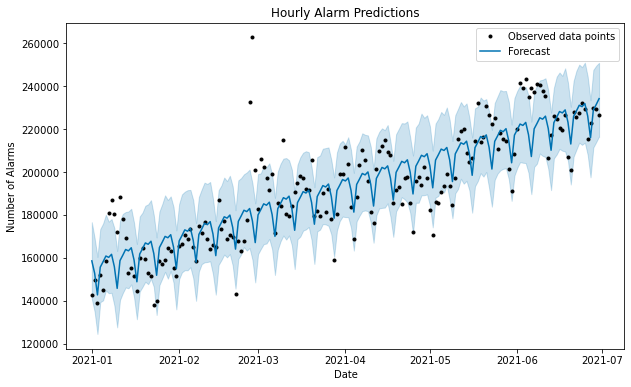

                     ds           yhat     yhat_lower     yhat_upper
177 2021-06-27 00:00:00  215975.026690  197539.909133  233432.742031
178 2021-06-28 00:00:00  228887.005906  211435.208883  247577.583240
179 2021-06-29 00:00:00  231386.373876  213898.284752  249493.761726
180 2021-06-30 00:00:00  234031.542069  216498.394969  250865.366116
181 2021-06-30 01:00:00  234194.000898  216281.262188  250793.183174


In [24]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df_resampled is already created and populated
# Remove timezone information if necessary
df_resampled['ds'] = df_resampled['ds'].dt.tz_localize(None)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_resampled)

# Create a dataframe for future predictions (next 1 hour)
future = model.make_future_dataframe(periods=1, freq='H')

# Predict the future
forecast = model.predict(future)

# Convert to numpy arrays
history_ds = model.history['ds'].values
history_y = model.history['y'].values

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history_ds, history_y, 'k.', label='Observed data points')
ax.plot(forecast['ds'].values, forecast['yhat'].values, ls='-', c='#0072B2', label='Forecast')
ax.fill_between(forecast['ds'].values, forecast['yhat_lower'].values, forecast['yhat_upper'].values, color='#0072B2', alpha=0.2)
ax.set_title('Hourly Alarm Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Alarms')
ax.legend()

plt.show()

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
